# Introduction
## Scientific Question: Is there any genes related with high-PTK2 expression in our data that can be used as potential research or therapeutic targets?

Overexpression of PTK2 gene has been considered one of the oncogenic markers for HGSOC (high-grade serous ovarian cancer) progression. HGSOC is also the most lethal gynecologic malignancy in the United States. Approximately 80% of patients with HGSOC exhibit serial disease recurrences. The PTK2 gene at 8q 24.3, encoding focal adhesion kinase (FAK), is frequently overexpression in ovarian cancer patients, and elevated PTK2 mRNA levels in serous ovarian carcinoma are associated with decreased patient overall survival. To have PTK2 overexpression is very common in stage 2-4 HGSOC patients, over 80% of patients have the overexpression, and over 25% of them have the PTK2 amplification, which is way higher than the other cancer types. Recent studies also show it is related to decreasing chemosensitivity and causing immune escape. Yet, the precise molecular mechanisms are still understudied, and the related targets downstream of the FAK and gene expression related to it is also largely unknown. 

Here by looking for upregulated genes in both selected high PTK2 expression clinical patients’ data and RNAseq data from high PTK2 expressed mice ovarian model, we are looking for candidate synthetic lethal genes under high PTK2 expression.

## Scientific Hypothesis: If the PTK2-driven gene is clinically significant and can be used as a potential therapeutic target for ovarian cancer patients, then the gene expression should change significantly among our in KMF (spontaneous Kras, Myc, and FAK genes gain)/MOVCAR (independent murine ovarian carcinoma) models and clinical patient data.

Thus, looking for druggable candidate synthetic lethal targets in high PTK2 expressed patients is an urgent need for ovarian cancer therapeutics. Here taking the advantage of bioinformatics analyses, we now can dig deeper into the large-scale genomic data and look for the possible PTK2 driven targets. 

We use the two newly characterized murine models here, one with gains in Kras, Myc, and FAK genes (KMF model), one with T antigen transgenic and derived from mice primary ovarian tumor (MOVCAR model). Both represent high PTK2 expression with HGSOC phenotypes. By combining the upregulated gene information in these two models, and then selecting the ones also upregulated in clinical HGSOC samples, the resulting genes will give us a better understanding of FAK mechanisms and serve as possible therapeutic opportunities to inhibit tumors. 

Overall, candidate genes need to pass all 4 steps: 1. the gene is differently overexpressed in the murine model 2. the gene is differently overexpressed in clinical patients' data 3. the gene appears in all three datasets after filtration 4. the gene will be causing a downregulation on survival rate comparing to non-overexpressed patients.

The well sequenced genetic landscape of HGSOC patients and models allow us to approach and investigate the underlying molecular mechanisms. Our findings will be used as potential drug treatment targets and research focus. A complete understanding of PTK2 driven expression will be valuable for future research and patients’ survival. 

## Data Source

The RNAseq and significant gene list are provided by Schlaepfer's lab. All clinical data were downloaded from TCGA publicly available site under serous ovarian cancer type. 


# Loading in Packages

matplotlib-venn: Packages give the ability for plotting area-weighted two- and three-circle venn diagrams. Including creating venn diagrams, changing the circle color, changing the outline of circles, and also add the titles and axis. The package provides four main functions: venn2, venn2_circles, venn3 and venn3_circles.The functions venn2 and venn2_circles accept as their only required argument a 3-element list (Ab, aB, AB) of subset sizes. The functions venn3 and venn3_circles take a 7-element list of subset sizes (Abc, aBc, ABc, abC, AbC, aBC, ABC), and draw a three-circle area-weighted venn diagram. Alternatively, you can provide a list of three set or Counter objects (rather than counting sizes for all 7 subsets). Source:https://pypi.org/project/matplotlib-venn/.

cmapPy: Tools for interacting with .gctx and .gct files, and other Connectivity Map resources. Integrated with Python’s pandas package) allowing users to easily read, modify, and write .gct and .gctx files. By using this package, all imported gct file can be used and regulated with panda coding(examples see the following code line). Also the gct files will be saved with GCToo class, this contains 3 component dataframes (row_metadata_df, column_metadata_df, and data_df) as well as an assembly of these 3 into a multi index df that provides an alternate way of selecting data. Source and tutorial: https://github.com/cmap/cmapPy.

seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here in this project, the seaborn package mainly used for heatmap plotting. This package will plot a matrix using hierachical clustering to arrange the rows and columns as heat map. However, seaborn can do way more than just heatmap. Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

pathlib: I use this package for exporting codes. However, this module offers classes representing filesystem paths with semantics appropriate for different operating systems. Path classes are divided between pure paths, which provide purely computational operations without I/O, and concrete paths, which inherit from pure paths but also provide I/O operations. The pathlib also provides an object API for working with files and directories. Basically it provides various classes representing file system paths with semantics appropriate for different operating systems. Source: https://docs.python.org/3/library/pathlib.html

numpy: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. It offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. In this project I used it for log, mean, and quartile calculation. It also has functions for working in domain of linear algebra, fourier transform, and matrices. Source: https://numpy.org/install/

pandas: A a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Pandas is an open source, and also is most widely used for data science/data analysis and machine learning tasks. It is also built on top of another package named Numpy, which provides support for multi-dimensional arrays. It is used for data cleaning and analysis. Here, Pandas is the best tool for handling this real-world messy data. Source: https://pandas.pydata.org

matplotlib.pyplot: It is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager. It is mainly intended for interactive plots and simple cases of programmatic plot generation. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation. Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In [478]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install biomart

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cmapPy

     |████████████████████████████████| 150 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [852]:
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

# Bioinformatics Analysis

## Part 1 Importing the file

Here we read the gct file, which is is a tab-delimited text file that contains gene expression data. The TCGA_OV_EXP contains the clinical high grade ovarian cancer patients data downloaded from the TCGA webstie. TCGA is publcly avaible and contain both RNAseq and survival information.

The main point for part 1 is to divde the data to 2 parts -- separated the patients into 2 groups based on the PTK2 expression.  The overexpressed PTK2 patients' group have the top 50% of the PTK2 expression level, while the other has been grouped into the relatively low-expressed PTK2 patients’ group. Although the PTK2 expression in patients is way higher than in normal genes , to separate the 2 groups will make sure we only extract the genes from the most overexpressed patients

In [2]:
# read in clinical data from the gct that was saved from the TCGA website
data = parse('TCGA_OV_EXP.v1.gct')

In [955]:
#run a transpose of the list, by doing this the new data will be automatically saved as a dataframe 
data_tem = data.data_df.transpose()
data_tem

rid,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
list,,,,,,,,,,,,,,,,,,,,,
TCGA_24_1924,218.569336,-0.269975,-0.157383,99.079033,6490.244141,21.284306,246.208984,0.312282,-0.570901,853.212646,...,749.487915,1174.183716,55.900604,387.063782,778.470520,73.863983,1112.602661,8161.549316,527.821655,733.553284
TCGA_61_2003,73.053200,-0.269975,0.441044,114.186905,10357.916016,1.036416,415.068024,1.649382,-0.570901,541.617310,...,315.587189,844.792358,64.207581,324.672058,1119.315796,26.096148,579.322571,7385.353027,1145.804443,638.265320
TCGA_24_1425,40.476273,0.038753,98.187828,69.088600,26279.804688,0.908619,243.668427,-0.045474,-0.570901,519.141724,...,531.984619,813.498901,53.658260,459.541107,1098.800781,4.657618,978.631165,9636.193359,1829.299805,825.511108
TCGA_09_1659,102.503548,-0.269975,23.473730,91.807983,4749.403320,-0.158680,753.054077,0.336909,-0.570901,822.172485,...,357.281342,1755.467285,37.252705,74.011948,1083.556641,6.308555,383.871704,6598.407715,437.846222,544.470215
TCGA_OY_A56Q,29.120749,-0.269975,285.675201,72.253586,9458.369141,226.641953,222.404602,1.544862,-0.570901,1071.882690,...,429.842712,930.484192,35.019081,239.974258,1757.926514,141.004913,1000.073853,6698.448242,448.557587,2462.888184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA_29_1695,48.510525,-0.269975,1.338852,89.285118,7417.031250,374.563751,136.689438,-0.045474,-0.570901,712.138916,...,606.085938,1236.128174,31.923386,223.116837,627.281250,0.525564,377.905609,6510.705078,745.047241,1093.091797
TCGA_31_1950,7.881285,-0.269975,72.509071,39.034214,3848.108398,76.277466,253.575150,-0.045474,-0.570901,1929.221680,...,360.435791,862.736328,51.124718,299.320312,1399.216919,11.457495,874.650085,2532.542236,872.962158,734.966187
TCGA_59_2348,96.690483,-0.269975,0.118996,35.399021,30217.318359,1.221086,206.318909,0.893780,-0.430156,935.048218,...,451.596222,1816.237183,95.684402,549.749634,760.225037,127.601051,843.517151,4509.158203,670.456238,894.788269


In [245]:
#extract the PTK2 expression for each patients
data.data_df.loc['PTK2']

list
TCGA_24_1924    1206.400146
TCGA_61_2003    2252.775391
TCGA_24_1425    3140.530029
TCGA_09_1659    1836.223389
TCGA_OY_A56Q    3194.658203
                   ...     
TCGA_29_1695    2164.036377
TCGA_31_1950    2004.174316
TCGA_59_2348    3297.791260
TCGA_61_2094    1704.538574
TCGA_61_2095    1749.169067
Name: PTK2, Length: 305, dtype: float32

In [247]:
#Saved the PTK2 expression into a new data
data2 = data.data_df.loc['PTK2']
#change the list to a dataframe
data3 = data2.to_frame()
#Switch the columns and row again so that we can see the quartile distribution
data4 = data3.transpose()
data3.quantile([0.25,0.5,0.75])

,PTK2
0.25,2010.992065
0.50,2615.652588
0.75,3427.042480


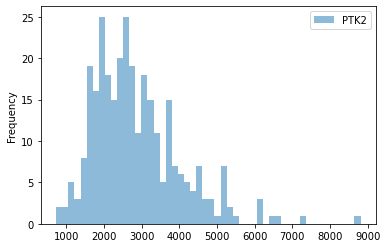

In [248]:
#Qucik histogram generation so we have a general visuallized idea fro PTK2 expression
ax = data3.plot.hist(bins=50, alpha=0.5)

In [966]:
#Divide the patients into 2 group, the hi_expression ones have the top 50% of PTK2 expression
#The lo_expression ones have the bottom 50% of PTK2 expression

#The code here return a boolean list, hi_ex will show True for all the paticients that are top 50% of PTK2
#lo_ex will show on the opposite
hi_ex = data4.gt(2600).any()
lo_ex = data4.le(2600).any()

#The function here is a preparation step for choosing out the patients list
def save(df,df2):
    df = df.to_frame()
    df.rename(columns = {0:'PTK2'}, inplace = True)
    #This code will leave the ones only have the 'True' value
    df2 = df[df.PTK2]
    #Reset the name of index, made it easier for following step
    df2.index.name="list"
    #Rest the index, so we now have a column that is 'list' and containg all of the gene information
    #This column will be selected and used for following steps
    df2 = df2.reset_index()
    return df2

amp1 = save(hi_ex, amp1)#This one now have all the patients list with top 50% of  PTK2
non_amp1 = save(lo_ex, non_amp1)#This one save the bottom 50%
amp1

,list,PTK2
0,TCGA_24_1425,True
1,TCGA_OY_A56Q,True
2,TCGA_29_1703,True
3,TCGA_23_2084,True
4,TCGA_25_1635,True
...,...,...
150,TCGA_13_0916,True
151,TCGA_13_1511,True
152,TCGA_23_1029,True
153,TCGA_24_1423,True


In [958]:
#create a new column, instead of saving patients list as index now it's a column, easier for the next step
data_tem.index.name="list"
data_tem = data_tem.reset_index()
#Right now the amp1 data only have the hi_expression patients code, non_amp1 only has the low_expression list
#Now what we need to do is to extract all of the gene information from the original data and divide them into 2 groups 

#### The global variables and local variables explaination is here.
Global variable : a variable defined outside of the function and or in a global scale
Local variable: are defined inside a function and its scope is limited to that function only
Example is in this following block!!!!

In [961]:
#The function remove the rows that are not in the checking list
#In this case by importing the orinal data, and the hi and low patients list,
#we are able to generate the data taht only have hi or low patients but with all the gene information this time
def extract(df, df2):
    #Create a boolean list that mark if the df list contain the same inform as df2 list, if it exist on df2 list, it will return
    #true
    #Here's the local variable if you try to call it outside the function it won't work
    a = 'local variable'
    df['existence'] = df['list'].isin(df2['list'])
    #Remove the ones return False
    df2 = df[df.existence]
    #Set the index
    df2 = df2.set_index('list')
    #EXchange the row and column
    df2 = df2.transpose()
    #drop the list we just created since we no longer need it
    df2 = df2.drop('existence', 0)
    return df2

#Here's the global variable you can all it in this entire python file or import into the function whenever you want
b = 'global variable'
# This one has all hi_expressed patients and with all the gene inform
cli_amp3 = extract(data_tem, amp1)

In [962]:
cli_amp3

list,TCGA_24_1425,TCGA_OY_A56Q,TCGA_29_1703,TCGA_23_2084,TCGA_25_1635,TCGA_25_1317,TCGA_24_2262,TCGA_24_1564,TCGA_24_1560,TCGA_24_1563,...,TCGA_29_1778,TCGA_09_1666,TCGA_29_1693,TCGA_61_2104,TCGA_36_1568,TCGA_13_0916,TCGA_13_1511,TCGA_23_1029,TCGA_24_1423,TCGA_59_2348
rid,,,,,,,,,,,,,,,,,,,,,
A1BG,40.476273,29.120749,137.909882,50.822025,18.910118,296.966614,253.809814,42.098095,56.64455,43.416672,...,169.089737,16.263067,92.722771,85.968803,132.609177,152.801178,104.164795,42.250587,40.590641,96.690483
A1CF,0.038753,-0.269975,-0.269975,-0.269975,-0.269975,0.0297,-0.269975,-0.269975,-0.269975,-0.269975,...,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975,-0.269975
A2BP1,98.187828,285.675201,0.532215,1.546557,1.357053,10.911489,0.420989,67.963577,152.747284,15.788051,...,2.377968,13.833262,2.525173,6.120789,0.168794,0.909876,1.44814,77.103439,19.287607,0.118996
A2LD1,69.0886,72.253586,96.2603,141.870544,73.458611,64.114449,67.516708,56.893345,37.067719,105.814507,...,84.873032,99.68335,299.186829,139.770111,95.08268,31.123138,151.452408,78.196991,42.948933,35.399021
A2M,26279.804688,9458.369141,8488.954102,8133.000977,4093.983154,2727.706543,9209.28125,8891.391602,2256.524414,12538.208008,...,7721.990234,12195.100586,2315.003906,6825.014648,5396.553223,9384.350586,3028.119385,2783.426025,5911.838379,30217.318359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,4.657618,141.004913,39.678951,326.621246,5.255293,15.158331,127.856506,55.411011,68.053917,46.402897,...,8.147142,1.065674,23.913223,37.7682,60.780796,29.784859,2.794073,245.675369,21.422924,127.601051
ZYG11B,978.631165,1000.073853,737.262146,1196.221313,670.307556,503.670746,544.493103,904.458984,880.345642,606.237854,...,622.695435,1180.828613,953.10907,890.967651,858.278076,529.056274,546.863831,1214.889648,400.551361,843.517151
ZYX,9636.193359,6698.448242,3963.860596,9884.522461,3993.744385,4699.540039,3931.686523,4981.459961,8855.966797,4616.283203,...,3807.998291,6402.297852,4502.317871,4559.453125,4786.473145,4253.695801,4015.712891,4539.866699,3274.506348,4509.158203


In [963]:
# This one has all low_expressed patients and with all the gene inform
cli_non_amp4 = extract(data_tem, non_amp1)

#### Part1.1 The TCGA data here turns out to be all RNAseq data. In order to tell which one significantly related with PTK2 and has statistical significance. I export them as csv and use DESeq2 for one step RNAseq analysis. If you are running the code no more need to run this blocks here, I was just to generate the block so they fulfill the DESeq2 formate requirement. The result of DESeq2 has been reimported in the next step. You can also find it with the DESeq2 coding in the github.
Sorry for making things so complicated here, but RNAseq analysi turns out to be complicated on python but DESeq2 on R is like one step thing. 

In [346]:
#This is a preration step to export all the information out for a DESeq2 analysis
#The DESeq2 coding is also uploaded on the github

#the gene expression merge and export as a csv here, but in a way the high_expressed PTK2 patients data go first
#and then the low_expressed ones go next

#hp_expression = pd.concat([cli_amp3, cli_non_amp4], axis=1)
#hp_expression = hp_expression.astype(int)
#filepath = Path('/Users/kelprabbit/Documents/Lab_Analysis/Individual_project/ovarian_cancer_gene_expression/merge_hpexpression.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#hp_expression.to_csv(filepath)

# paticient list merge and export out as csv here
#def listing(df, df2):
#    df2 = df['list']
#    df2 = df2.to_frame()
#    return df2

#listing(cli_amp3, hi_p)
#lissting(cli_non_amp4, hi_np)
#hi_p['st'] = 'hi_p'
#hi_np['st'] = 'nh_p'
#hi_p = hi_p.set_index('list')
#hi_np = hi_np.set_index('list')
#merge_hp = [hi_p, hi_np]
#resultp = pd.concat(merge_hp)

#This is a preration step to export all the information out for a DESeq2 analysis
#filepath = Path('/Users/kelprabbit/Documents/Lab_Analysis/Individual_project/ovarian_cancer_gene_expression/merge_hp.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#resultp.to_csv(filepath)

## Part2 Lab data import

In [974]:
#Import significant PTK2 related gene list from KMF models, data provided by lab
kmf_f = pd.read_csv('kmf_final.csv')
#Import significant PTK2 related gene list from MOVCAR models, data provided bylab
movcar_f = pd.read_csv('movcar_final.csv')
#function here simply change the format of the way I saved the data here
def formt(df,df2):
    #A new list only saved the gene names, since the original gene already only left the significant ones
    df2 = df['query']
    #change the list to dataframe
    df2 = df2.to_frame()
    #Rename the column name, just make it easier for me to select
    df2.rename(columns = {'query':'gene'}, inplace = True)
    return df2

#Run the function
kmf_final = formt(kmf_f, kmf_final)
#Same
movcar_final = formt(movcar_f, movcar_final)

## Part3 Data filtering 
To identify the potential targets in high-PTK2 expressed samples, we established a bioinformatic pipelines that identified the high expressed genes with both clinical significance and research possibilities. Candidate genes need to pass all 3 steps: 1. the gene is differently overexpressed in clinical patients' data 2. the gene is differently overexpressed in the murine model 3. the gene appears in all three datasets after filtration 

Here the significant overexpressed genes in murine model have already been selected by lab members and imported in this file in part2. The main point for Part3 now is filtering the important ones from clinical data and also choose the ones that appear in all three dataset.

#### Part3.1 selecting significant genes from clinical data

In [471]:
#Import the DESeq2 RNAseq result from clinical data. It calculate all the information based on comparing the hi-PTK2 expressed
#group with low-PTK2 expressed group
#The genes are not selected here so that's what we are gonna do
rslthp = pd.read_csv('analysis_hi.csv') 
rslthp

,newColName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG,99.084431,0.299077,0.129340,2.312328,0.020760,0.113470
1,A1CF,0.006640,-0.009705,2.895194,-0.003352,0.997325,NaN
2,A2BP1,34.524750,0.426753,0.352844,1.209466,0.226484,0.467307
3,A2LD1,101.536443,-0.208435,0.089464,-2.329829,0.019815,0.110217
4,A2M,6383.371833,-0.279501,0.100411,-2.783576,0.005376,0.045022
...,...,...,...,...,...,...,...
20494,ZYG11A,54.947962,0.029165,0.195758,0.148983,0.881567,0.945259
20495,ZYG11B,753.050165,-0.111303,0.055038,-2.022291,0.043146,0.177318
20496,ZYX,5538.423655,0.056296,0.071175,0.790945,0.428976,0.660344
20497,ZZEF1,782.548062,-0.013938,0.071181,-0.195817,0.844754,0.925930


In [472]:
#Sorted the genes by it's padj value, which is also the value we used for diciding whether the relationship is significant
#The threshold here is <0.25
rslthp = rslthp.sort_values('padj')
#The DESeq2 gives some gene reault as Nan, this step kicks them out
rslthp = rslthp[rslthp['padj'].notna()]
#Only keeping the ones that are significant
rslthp_final = rslthp[rslthp['padj'] < 0.25]
rslthp_final
#only 25% of them left

,newColName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
14315,PTK2,2851.973444,-0.913312,0.040322,-22.650438,1.381308e-113,2.489255e-109
6784,GAGE4,96.870418,4.663044,0.284937,16.365203,3.388962e-60,3.053624e-56
20272,ZNF623,793.190358,-0.775149,0.056416,-13.739778,5.865540e-43,3.523430e-39
20376,ZNF7,841.610637,-0.752337,0.057722,-13.033830,7.856252e-39,3.539438e-35
3696,CHRAC1,1378.613282,-0.727194,0.057528,-12.640732,1.258771e-36,4.536863e-33
...,...,...,...,...,...,...,...
5938,FAM165B,388.769574,0.120372,0.067947,1.771561,7.646745e-02,2.495961e-01
9160,KLRC1,5.078944,0.518117,0.292490,1.771400,7.649416e-02,2.496380e-01
10822,MFAP3,753.343416,-0.086550,0.048870,-1.771007,7.655955e-02,2.497238e-01
10959,MLLT11,240.511195,0.239715,0.135353,1.771038,7.655434e-02,2.497238e-01


#### Part3.2 Data filtering based on existence

In [981]:
#So now we want to see which genes appear in both significant clinical genes and also out model
#Here's the function which will help us finish this function
#df here we will pass our clinical significant data, which just generalized in part 3.1
#df2 will be the place we save new selected data
#df3 will pass the model genes from lab data
def filtration(df, df2, df3):
    df2 = df.copy()
    #create a column where is returning a boolean value telling sus whether or not the gene is fouble existed
    df2['double_existence'] = df['newColName'].isin(df3['gene'])
    #Remove those non double existed ones
    df2 = df2[df2['double_existence'] != False]
    return df2

#Run the function here 
rslthp_kmf = filtration(rslthp_final, rslthp_kmf, kmf_final)
#Now based on the previous step, we change the df, this will give us the genes that exist in all three dataset
rslthp_tri = filtration(rslthp_kmf, rslthp_mov, movcar_final)

#here we can see only ~15% of gene is existed in both kmf and clinical 
rslthp_kmf

,newColName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,double_existence
14315,PTK2,2851.973444,-0.913312,0.040322,-22.650438,1.381308e-113,2.489255e-109,True
3696,CHRAC1,1378.613282,-0.727194,0.057528,-12.640732,1.258771e-36,4.536863e-33,True
7210,GPAA1,4087.282177,-0.870212,0.074363,-11.702276,1.240809e-31,2.795077e-28,True
19776,ZC3H3,1018.769944,-0.717777,0.062456,-11.492560,1.437863e-30,2.355612e-27,True
6138,FAM83H,3301.603036,-0.950528,0.084536,-11.244025,2.478199e-29,3.721635e-26,True
...,...,...,...,...,...,...,...,...
357,ADSL,1359.660186,0.113334,0.063685,1.779585,7.514389e-02,2.468857e-01,True
716,ANLN,843.722609,-0.165974,0.093434,-1.776384,7.566972e-02,2.479216e-01,True
18903,TUBA1C,7232.294014,0.124272,0.070041,1.774281,7.601669e-02,2.486201e-01,True
18293,TMEM63A,1004.527730,-0.140864,0.079421,-1.773640,7.612276e-02,2.487413e-01,True


In [980]:
#here we can see only 56 genes is existed in all three models kmf, movcar, and clinical 
rslthp_tri.shape

(56, 8)

#### Part3.3 Filtering based on expression

In [1012]:
#In this step we filtrat genes based on the expression amount
#We want the over expression not to be too low and so is the baseMean
rslthp_ana = rslthp_tri.copy()
#We select the genes that at leat have baseMean >100
rslthp_ana = rslthp_ana[rslthp_ana['baseMean'] > 100]
#Change the foldchange to absolute number so it's easier to compare
rslthp_ana['log2FoldChange'] = rslthp_ana['log2FoldChange'].abs()
#Only slected the ones change significantly
rslthp_ana = rslthp_ana[rslthp_ana['log2FoldChange'] > 0.25]

In [1013]:
#Import the lab data which they already selected some of the research interests
kmf_significant_gene = pd.read_csv('KMF_Stupack_analysis_gene.csv')

In [1014]:
#In this part we filtrate the genes and only look for the one have been proved highly related with cancer progression
#previous selected genes is provided by the lab
rslthp_ana['double_existence'] = rslthp_ana['newColName'].isin(kmf_significant_gene['Gene'])
#Remove the non double existed ones
rslthp_ana = rslthp_ana[rslthp_ana['double_existence'] != False]
#Rename the column so it's more straightforward
rslthp_ana.rename(columns = {'newColName':'gene'}, inplace = True)

In [1015]:
#Only 8 genes left
rslthp_ana

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,double_existence
10396,LYNX1,1000.580224,1.892938,0.217883,-8.687872,3.692918e-18,1.255662e-15,True
11669,NDRG1,10057.584165,0.778548,0.111542,-6.979877,2.954395e-12,5.432770e-10,True
9078,KLF10,1420.868875,0.284656,0.085236,-3.339636,8.388822e-04,1.245059e-02,True
5554,ENDOD1,1365.293174,0.284318,0.097766,-2.908142,3.635835e-03,3.455755e-02,True
4033,COL5A2,3176.334212,0.516150,0.179759,-2.871340,4.087359e-03,3.744702e-02,True
13282,PGM2L1,618.288134,0.316740,0.125219,-2.529498,1.142259e-02,7.590211e-02,True
4024,COL3A1,42997.864464,0.410754,0.185000,-2.220293,2.639886e-02,1.308039e-01,True
4032,COL5A1,5984.147818,0.341575,0.184951,-1.846838,6.477060e-02,2.271319e-01,True


# Plotting The Results 
#### Part4.1 Venn Diagram

In [485]:
#Selecting the list we want to cmompare and make the Venn graph
#In this case we only want to compare which significant genes in each dataset
#So we compare the gene list after a general selection
mov_list = movcar_final['gene']
kmf_list = kmf_final['gene']
all_list = rslthp_final['newColName']

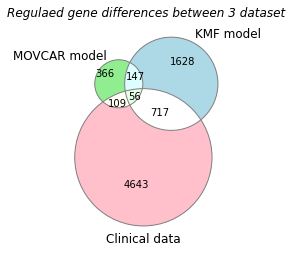

In [506]:
#This geneate the Venn graph with proper data, labels, color, and opacity
venn3([set(mov_list), set(kmf_list),set(all_list)],set_labels=('MOVCAR model', 'KMF model','Clinical data'),set_colors=('lightgreen', 'lightblue','pink'),alpha = 1)
#This one change the outline of each circle
venn3_circles([set(mov_list), set(kmf_list),set(all_list)], linestyle='-',linewidth=1, color='grey')
#This adds the title
plt.title('Regulaed gene differences between 3 dataset',style='italic')
#This actually shows the picture
plt.show()

#### Part4.2 Heat map

In [1018]:
#In this part i want a heap map which compare the gene expresison for those 8 candidates but compare the expression in all 
#patients samples
#Hypothetically, the high PTK2 patients should have a different expression compare to the low PTK2 patients
#The funtion here bascially only select out the candidates gene expression from clinical data
#For df we will import the overy original cli_hi and low, which have patients data but group them into hi or low expression 
#group
#df2 is the place we save the information
#df3 is the place we used to pass the candidate gene list
def sett(df, df2, df3):
    #the original paticient data sample use the gene as index, here we extrat it out so we can use it
    df2 = df.reset_index()
    #compare which gene in the original list is also on the final list
    df2['gene_fi'] = df2['rid'].isin(df3['gene'])
    #Remove the ones that are not on the list
    df2 = df2[df2['gene_fi'] != False]
    return df2

#Resulting the candidate gene expression from hi PTK2 expression patients
cli_fi = sett(cli_amp3, cli_hi, rslthp_ana)
#Resulting the candidate gene expression from low PTK2 expression patients
cli_nhi = sett(cli_non_amp4, cli_nhi, rslthip_ana)

In [906]:
#First we append 2 data set to gether, the hi expressioned ones on the left and low expressed patients on the tight
hm_tem = pd.concat([cli_fi, cli_nfi], axis=1)
hm_hi = hm_tem.set_index('rid')
#Change everything to int so we can calculate z score
hm_hi = hm_hi.astype(int)
#This is just to sort the dataset by median
hm_hi['med'] = hm_hi.median(axis = 1)
hm_hi = hm_hi.sort_values(by=['med'])
#Remove the ones we just generate which are not real gene expression to make the heatmap more clear
hm_hi = hm_hi.drop('med', 1)
hm_hi = hm_hi.drop('gene_fi', 1)
#make the z-score calculation easier
hm_t = hm_hi.transpose()

In [907]:
#To make things easier to compare, for the heat map, we will convert everything to the correspoding z score
#It's calulating the z- score for each coloumn separately, which means it's based on each gene
dhm_t_zscore = (hm_t - hm_t.mean())/hm_t.std()
#make the x-axis patients number and y axis gene list
dhm_t_zscore2 = dhm_t_zscore.transpose()

<AxesSubplot:xlabel='list', ylabel='rid'>

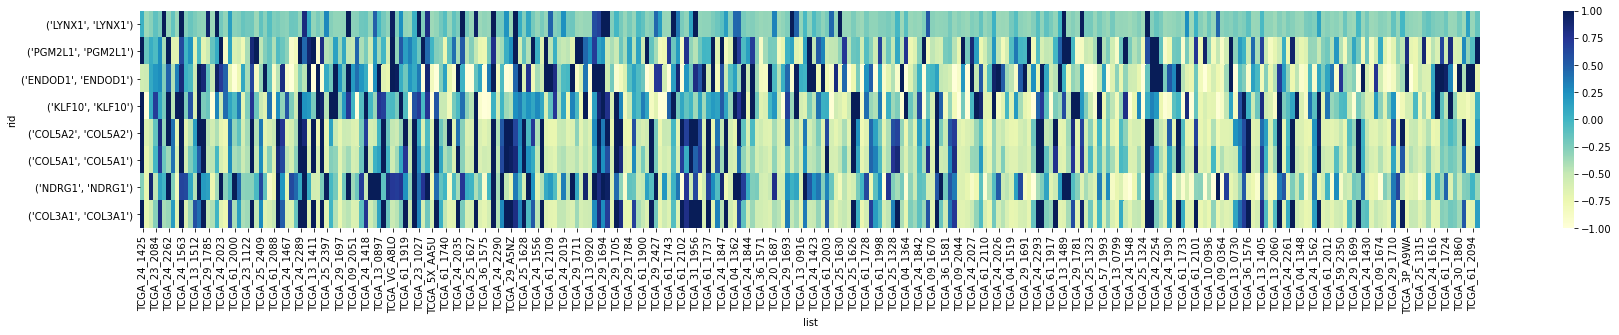

In [912]:
#Making the plot size big enough to contain all the infomation
plt.figure(figsize=(30,4))
#This actuallt generates the heatmap, we also choose the color and min and max here
sns.heatmap(dhm_t_zscore2,cmap="YlGnBu",vmax = 1 , vmin =-1)

# Analyzing the Results

The Venn plot give us a general idea on how many possible candidates based on the 3 dataset. Compare to the entire dataset 56 is not a large number. And after we did the expression filtration on these 56 genes, our choices are even more limited. So after all these tiltrations and combing with the gene list our lab want to really focus on, only 8 genes left overall.

The heatmap then gives us an idea on these gene expression between High-PTK2 expressed patients(left side n=155) and low-PTK2 expressed patients(right sides n=150). Although it's not very straightforward, but we still can see a slight darker color on the high-PTK2 patients compare to the low-expressed one. While this data is directly coming from clinical patients, it's reasonable that the diferences are very obvious. Many things such as diet, ages, stage, etc, can influence clinical patients data, I think the differences we have here is enough to tell that for those 8 genes, high-PTK2 patients have a different expression rate compare to low-PTK2 patients.

Overall, we can conclude the 8 candidates gene here in HGSOC patients is driven by overexpression of PTK2(or FAK expression) . We provided evidence that the oncogenic activities of those genes are possible targets for clinically relevant therapy development. Thus, my hypothesis is right.